# Kaggle Challenge
https://www.kaggle.com/adityakadiwal/water-potability/
Predict if water is safe for Human consumption
Task Details

Create a model to determine if the sample tested from the water body is fit for human consumption or not.
This dataset may require you to treat missing value if any and check for data imbalance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./water_potability.csv")

## Take a look at data

In [3]:
print(f'Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}')

print(list(data.columns))  # Headers of data

data.info()

Number of rows: 3276 
Number of columns: 10
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Dealing with missing values

In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

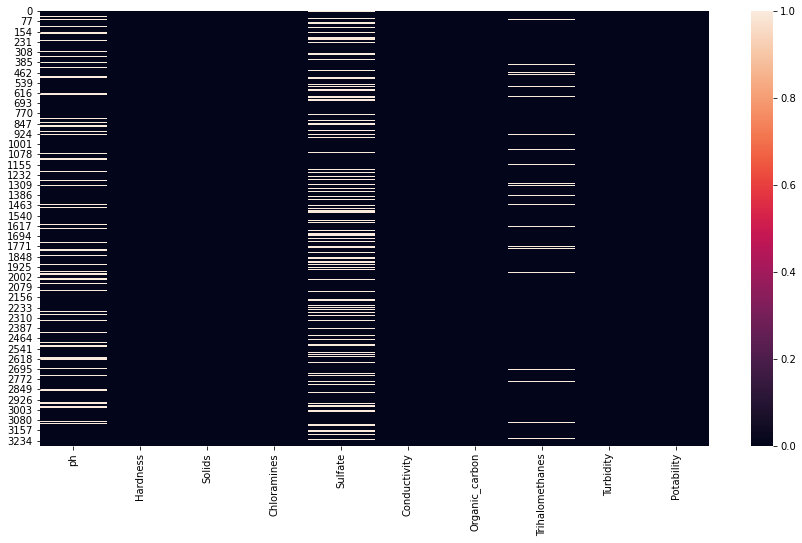

In [6]:
# Display missing values using a heatmap to understand if any patterns are present
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull());

In [7]:
# calculate the missing percentage of data

def calculateMissingVal(df):
    totalRows = data.shape[0]
    missingDict = {}

    for header in data.columns:
        missingTotal = df[header].isnull().sum()

        if not missingTotal: continue
        
        missPercentage = (missingTotal / totalRows) * 100
        missingDict.setdefault(header, [ missingTotal, missPercentage ])

    return missingDict


missingDF = pd.DataFrame.from_dict(calculateMissingVal(data), orient="index", columns=["Missing", "Percent"]).reset_index()
missingDF.rename(columns={"index": "Header"}, inplace=True)

missingDF

,Header,Missing,Percent
0,ph,491,14.987790
1,Sulfate,781,23.840049
2,Trihalomethanes,162,4.945055


### Replace missing value by using mean operation, take the average of all

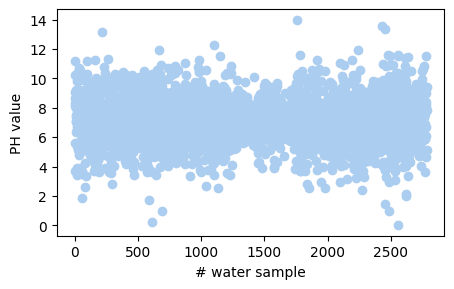

In [8]:
pHValues = data["ph"].dropna()

bins = list(range(0, 15))

plt.figure(figsize=(5, 3), dpi=100)
plt.scatter(list(range(len(pHValues))), pHValues, color="#abcdef")
plt.xlabel("# water sample")
plt.ylabel("PH value")

plt.show()

According to the above graph, the value of PH seems very random thoughout the dataset, Therefore I think get the average or median of them to fill the NAN values is the way to go

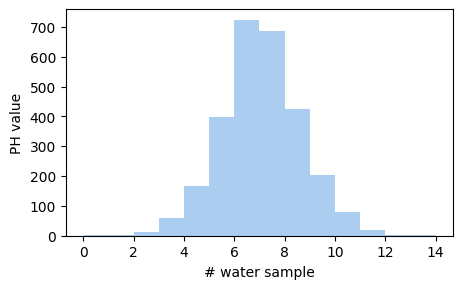

In [9]:
pHValues = data["ph"].dropna()

bins = list(range(0, 15))

plt.figure(figsize=(5, 3), dpi=100)
plt.hist(pHValues, bins=bins, color="#abcdef")
plt.xlabel("# water sample")
plt.ylabel("PH value")

plt.show()

In [10]:
# Fill all missing value with median
for header in missingDF["Header"]:
    median = data[header].median()

    data[header].fillna(median, inplace=True)

# Sklearn machine learning

In [11]:
# Seperate features and labels

X = data.drop(["Potability"], axis=1)
y = data["Potability"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=101)

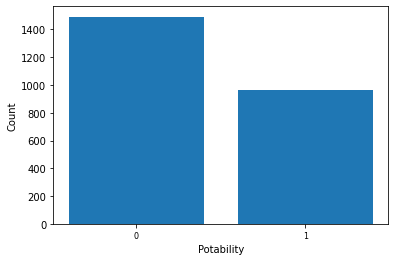

In [13]:
potabilityCounts = dict(trainY.value_counts())


plt.bar(potabilityCounts.keys(), potabilityCounts.values())
plt.xticks(list(potabilityCounts.keys()), size=8)
plt.xlabel("Potability")
plt.ylabel("Count") 
plt.show()

In [14]:
# Sacale input to 0 - 1 values
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [15]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

In [16]:
models =[("LR", LogisticRegression()),
         ("SVC", SVC()),
         ('KNN',KNeighborsClassifier()),
         ("DTC", DecisionTreeClassifier()),
         ("SGDC", SGDClassifier()),
         ("Ridge", RidgeClassifier()),
         ('RF', RandomForestClassifier()),]

finalResults = []

for name, model in models:
    model.fit(trainX, trainY)
    modelResults = model.predict(testX)
    pscore = precision_score(testY, modelResults, average="macro")
    ascore = accuracy_score(testY, modelResults)
    f1Score = f1_score(testY, modelResults, average=None, labels=[1, 0])
    finalResults.append(( name, pscore, ascore, f1Score ))


finalResults.sort(key=lambda k: k[3][0] + k[3][1], reverse=True)

In [17]:
finalResultsDf = pd.DataFrame(finalResults, columns=["Model", "Precision Score", "Accuracy score" , "F1 score"])

finalResultsDf

,Model,Precision Score,Accuracy score,F1 score
0,RF,0.691566,0.695971,"[0.48870636550308005, 0.7836663770634231]"
1,SVC,0.720368,0.693529,"[0.42032332563510394, 0.7917012448132781]"
2,KNN,0.611381,0.642247,"[0.44402277039848204, 0.7362736273627364]"
3,DTC,0.565121,0.584860,"[0.4736842105263159, 0.6572580645161291]"
4,SGDC,0.610260,0.620269,"[0.03715170278637771, 0.7634980988593156]"
5,LR,0.308913,0.617827,"[0.0, 0.7637735849056604]"
6,Ridge,0.308913,0.617827,"[0.0, 0.7637735849056604]"


## Randomized search

In [18]:
from sklearn.model_selection import RandomizedSearchCV

In [19]:
# Randomserach for RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(
    n_estimators = n_estimators, 
    max_depth = max_depth,     
    min_samples_split = min_samples_split, 
    min_samples_leaf = min_samples_leaf
)

In [20]:
clfRF_random = RandomizedSearchCV(RandomForestClassifier(), hyperF, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [21]:
clfRF_random.fit(trainX, trainY)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END max_depth=5,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   random_state=42, verbose=2)

In [22]:
print(clfRF_random.best_estimator_)
print(clfRF_random.best_params_)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 25}


In [23]:
predictionsY = clfRF_random.predict(testX)

In [24]:
print(f"Accuracy score {accuracy_score(testY, predictionsY)}")
print(f"Precision score {precision_score(testY, predictionsY)}")
print(f"Recall score {recall_score(testY, predictionsY)}")
print(f"F1 score {f1_score(testY, predictionsY, average=None, labels=[1, 0])}")

Accuracy score 0.6800976800976801
Precision score 0.6888888888888889
Recall score 0.2971246006389776
F1 score [0.41517857 0.77983193]


In [25]:
# Randomserach for SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


C = [0.00001, 0.001, 1, 10, 100]
kernel = [ "linear", "poly", "sigmoid", "rbf" ]
gamma = ["scale", "auto"]

hyperF = dict(
    C=C,
    kernel=kernel,
    gamma=gamma
)

In [26]:
clfSVC_random = RandomizedSearchCV(SVC(), hyperF, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [27]:
clfSVC_random.fit(trainX, trainY)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.001, gamma=auto

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=1,
                   param_distributions={'C': [1e-05, 0.001, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'sigmoid',
                                                   'rbf']},
                   random_state=42, verbose=2)

In [28]:
print(clfSVC_random.best_estimator_)
print(clfSVC_random.best_params_)

SVC(C=1)
{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


In [29]:
print(f"Accuracy score {accuracy_score(testY, clfSVC_random.predict(testX))}")
print(f"Precision score {precision_score(testY, clfSVC_random.predict(testX), average='macro')}")
print(f"Recall score {recall_score(testY, clfSVC_random.predict(testX))}")
print(f"F1 score {f1_score(testY, clfSVC_random.predict(testX), average=None, labels=[1, 0])}")

Accuracy score 0.6935286935286935
Precision score 0.7203683834048641
Recall score 0.29073482428115016
F1 score [0.42032333 0.79170124]


## Save the most accurate model 

In [30]:
import pickle

with open("./water_potability_predictions.pkl", "wb") as f:
    pickle.dump(clfSVC_random, f)